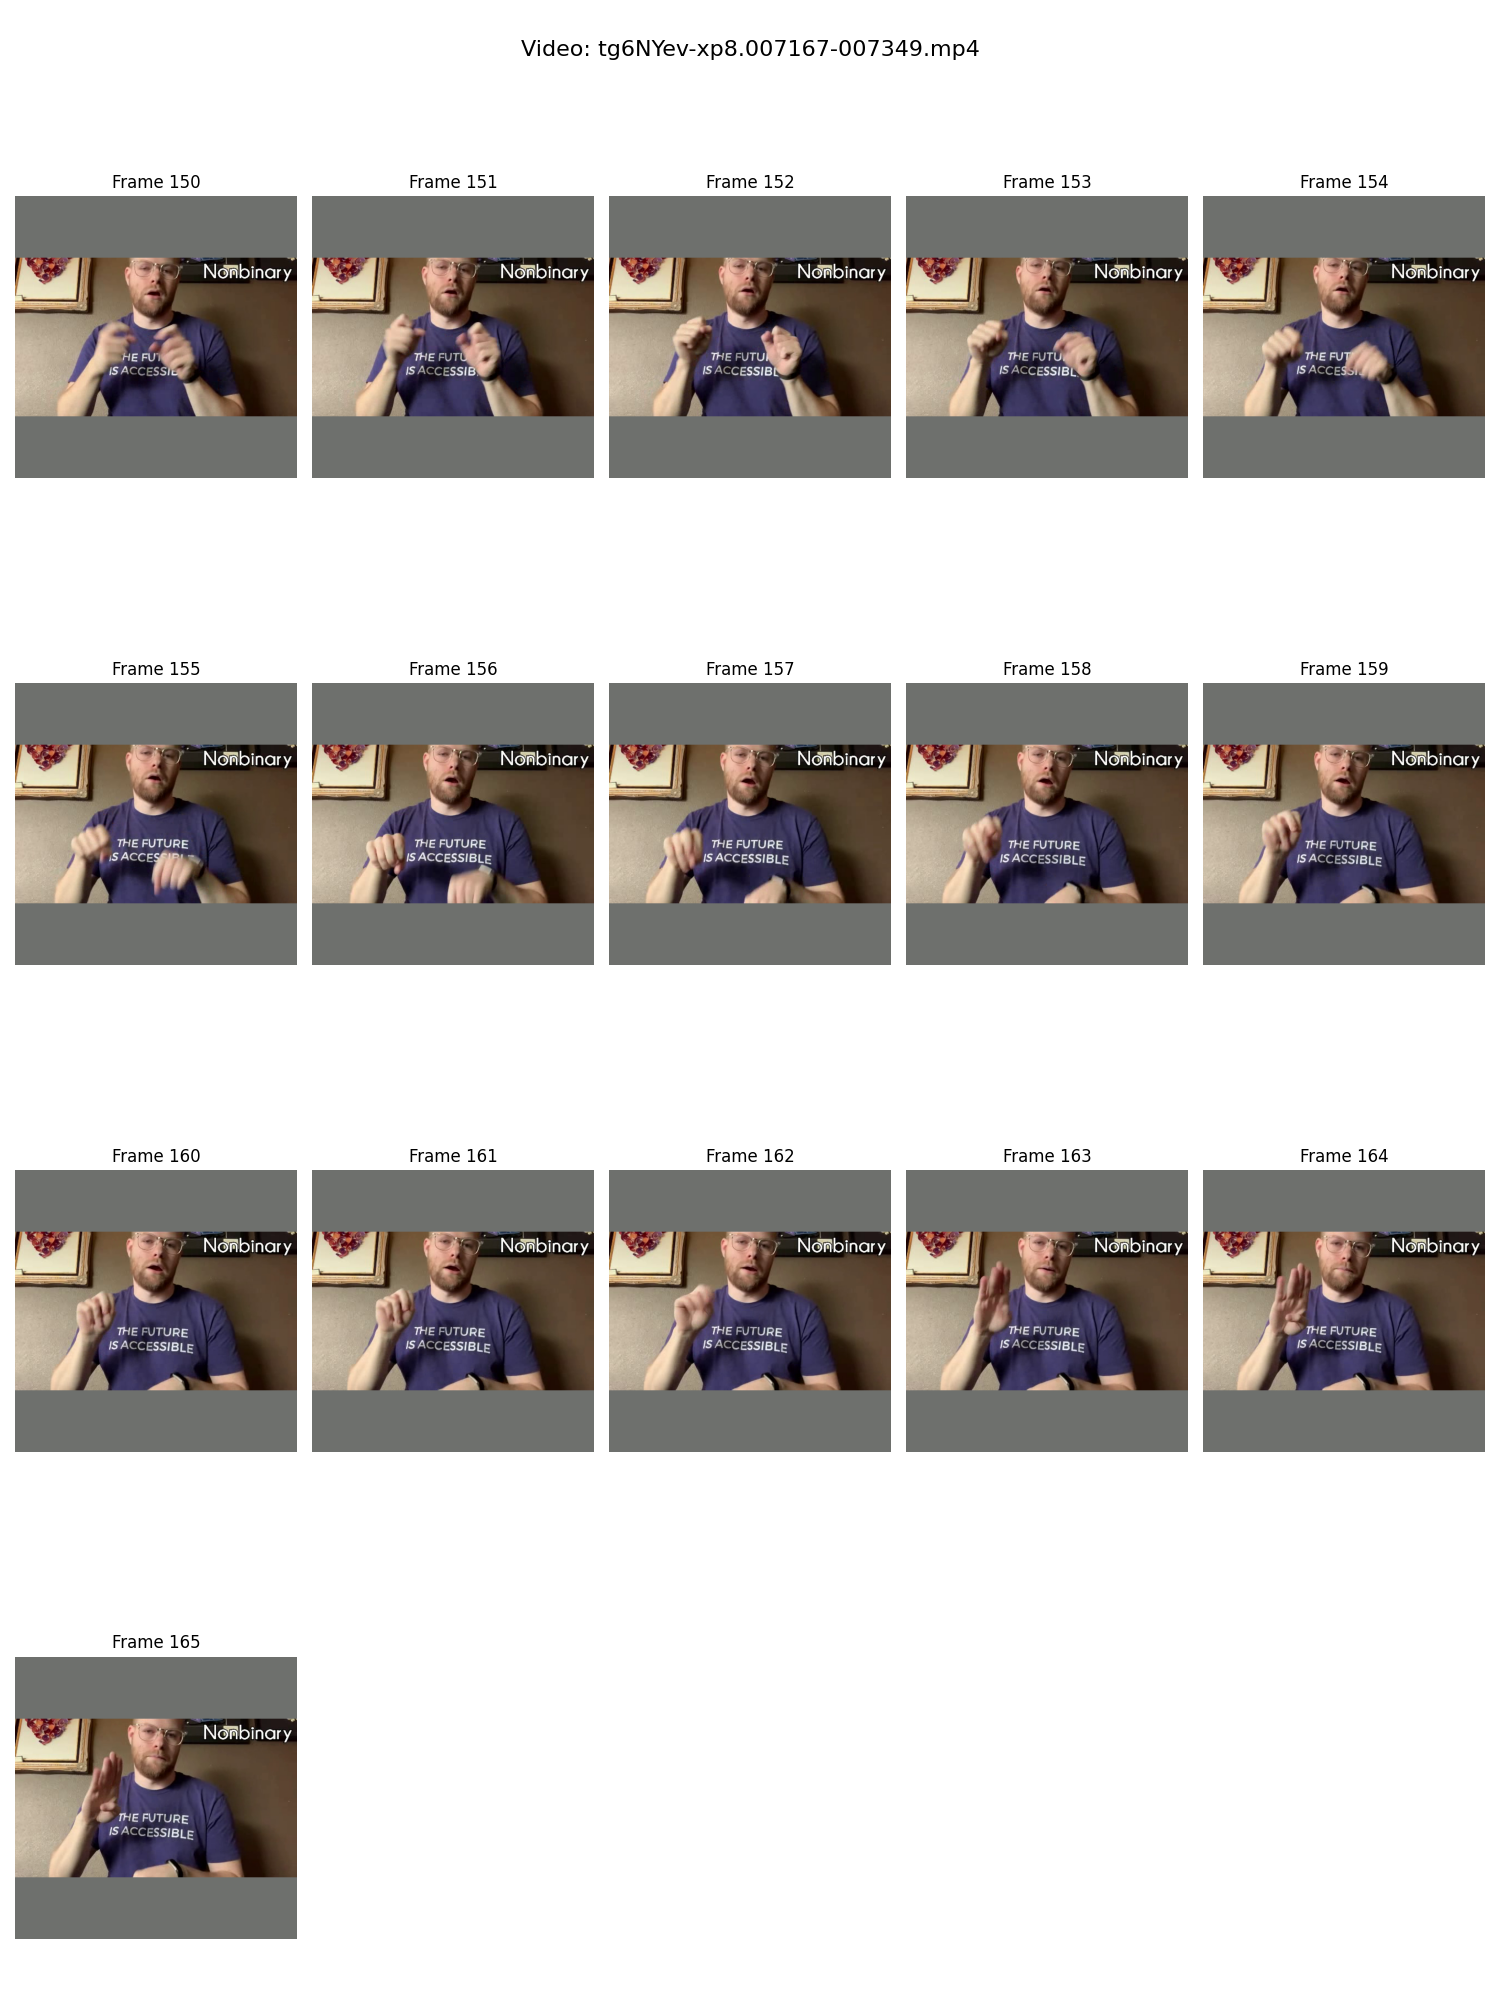

In [9]:
import av
import matplotlib.pyplot as plt
import os
import math

videoID = "tg6NYev-xp8.007167-007349"

start_frame = 150
end_frame = 165

folder = "/auto/plzen4-ntis/projects/korpusy_cv/JSALT/YouTubeASL/clips_cropped_ocr"
filename = f"{videoID}.mp4"
video_path = os.path.join(folder, filename)

container = av.open(video_path)
frames = []
frame_idx = 0

# Decode video frames and collect the desired range
for frame in container.decode(video=0):
    if start_frame <= frame_idx <= end_frame:
        img = frame.to_ndarray(format='rgb24')
        frames.append((frame_idx, img))
    frame_idx += 1
    if frame_idx > end_frame:
        break

if not frames:
    raise ValueError("No frames found in the specified range.")

# Determine grid layout: max 5 columns per row
nframes = len(frames)
ncols = 5 if nframes >= 5 else nframes
nrows = math.ceil(nframes / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))

# Flatten axs for easier iteration
if nrows > 1:
    axs = axs.flatten()
elif nframes == 1:
    axs = [axs]

# Plot each frame
for i, (f_idx, img) in enumerate(frames):
    ax = axs[i]
    ax.imshow(img)
    ax.set_title(f"Frame {f_idx}")
    ax.axis('off')

# Hide any unused subplots
for ax in axs[len(frames):]:
    ax.axis('off')

fig.suptitle(f"Video: {filename}", fontsize=16)

# Reduce vertical space between rows
plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=0.8)
plt.subplots_adjust(hspace=0.3)

plt.show()

In [7]:
!pip install --user ipywidgets ipympl
!jupyter nbextension enable --py widgetsnbextension --user
!jupyter nbextension enable --py ipympl --user

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python -m pip install --upgrade pip
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Enabling notebook extension jupyter-matplotlib/extension...
      - Validating: OK


Total frames decoded: 182


Output()

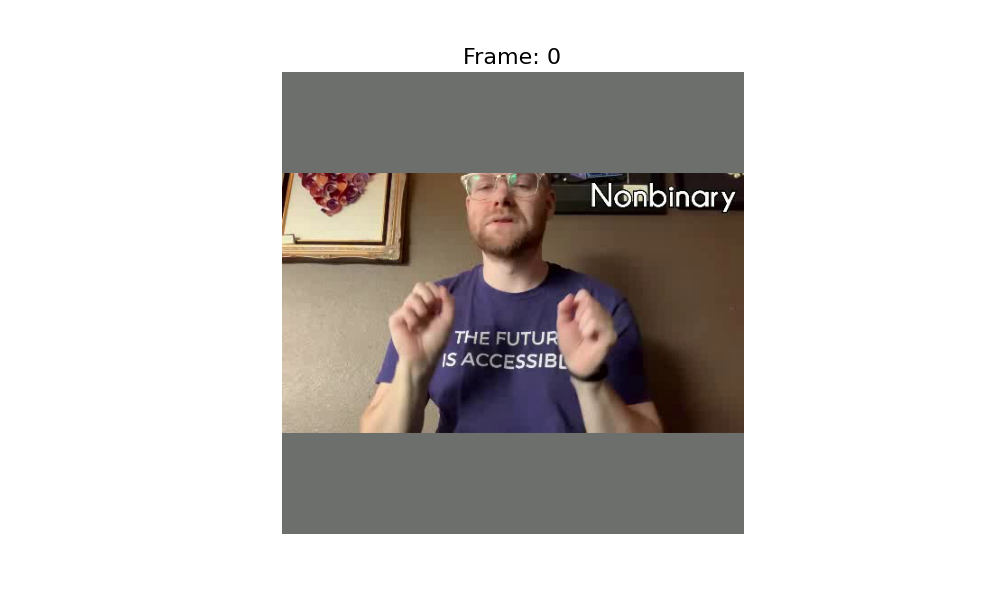

No such comm: 96e507d2a07e4d539bf81035a378ed09
No such comm: 96e507d2a07e4d539bf81035a378ed09
No such comm: 96e507d2a07e4d539bf81035a378ed09
No such comm: 96e507d2a07e4d539bf81035a378ed09
No such comm: 96e507d2a07e4d539bf81035a378ed09


In [1]:
%matplotlib notebook
import av
import os
import matplotlib.pyplot as plt
import ipywidgets as widgets
import ipympl  # ensures ipywidgets + matplotlib integration
from IPython.display import display

videoID = "tg6NYev-xp8.007167-007349"


folder = "/auto/plzen4-ntis/projects/korpusy_cv/JSALT/YouTubeASL/clips_cropped_ocr"
filename = f"{videoID}.mp4"
video_path = os.path.join(folder, filename)

# Open the video container using av
container = av.open(video_path)

# Decode video frames and store them in a list
frames = []
for frame in container.decode(video=0):
    # Convert the frame to an RGB image (as a NumPy array)
    img = frame.to_ndarray(format='rgb24')
    frames.append(img)

total_frames = len(frames)
print(f"Total frames decoded: {total_frames}")

# Create a slider widget for frame selection
frame_slider = widgets.IntSlider(
    value=0, 
    min=0, 
    max=total_frames - 1, 
    step=1, 
    description='Frame:'
)

# Optional: Create a play widget to auto-play the frames
play_widget = widgets.Play(
    value=0, 
    min=0, 
    max=total_frames - 1, 
    step=1, 
    interval=50,  # Adjust interval (ms) to control playback speed
    description="Play"
)
# Link the play widget to the slider
widgets.jslink((play_widget, 'value'), (frame_slider, 'value'))

# Output area for displaying frames
output = widgets.Output()

def show_frame(frame_index):
    output.clear_output(wait=True)
    img = frames[frame_index]
    # Create a figure to display the frame
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(img)
    ax.set_title(f"Frame: {frame_index}", fontsize=16)
    ax.axis('off')
    plt.show()

def on_slider_change(change):
    show_frame(change['new'])

# Set up the observer to update frame display when slider changes
frame_slider.observe(on_slider_change, names='value')

# Display the player controls and output
display(widgets.HBox([play_widget, frame_slider]))
display(output)

# Display the first frame initially
show_frame(0)


In [4]:
import ipywidgets as widgets
from IPython.display import display

slider_test = widgets.IntSlider(value=5, min=0, max=10)
display(slider_test)

IntSlider(value=5, max=10)

No such comm: e3e4a204b52b446088d050486b9eb75f
No such comm: e3e4a204b52b446088d050486b9eb75f
No such comm: e3e4a204b52b446088d050486b9eb75f
No such comm: e3e4a204b52b446088d050486b9eb75f
No such comm: e3e4a204b52b446088d050486b9eb75f
No such comm: e3e4a204b52b446088d050486b9eb75f


In [2]:
#!jupyter nbextension install --py ipympl --user
!jupyter nbextension enable  --py ipympl --user

!jupyter nbextension enable  --py widgetsnbextension --user

Enabling notebook extension jupyter-matplotlib/extension...
      - Validating: OK
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
!jupyter nbextension list

Known nbextensions:
  config dir: /auto/plzen4-ntis/home/javorek/.jupyter/nbconfig
    notebook section
      jupyter-js-widgets/extension  enabled 
      - Validating: OK
      jupyter-matplotlib/extension  enabled 
      - Validating: OK
  config dir: /storage/plzen4-ntis/home/javorek/.local/etc/jupyter/nbconfig
    notebook section
      jupyter-matplotlib/extension  enabled 
      - Validating: OK
      jupyter-js-widgets/extension  enabled 
      - Validating: OK
  config dir: /usr/local/etc/jupyter/nbconfig
    notebook section
      jupytext/index  enabled 
      - Validating: OK
